# Import packages

In [2]:
import sys
#sys.path.append("D:\Julian\workspace\endolas")
sys.path.append("/home/julian/Documents/Studium/MT-Masterarbeit/Workspace/endolas")

import numpy as np
import matplotlib.pyplot as plt
from endolas import utils
import os
import importlib

import pandas as pd
import seaborn as sns

Segmentation Models: using `tf.keras` framework.


# Load data and plot

In [3]:
base_path = '/home/julian/Documents/Studium/MT-Masterarbeit/Workspace/endolas/experiments/results/8_{}_euclidean/accuracy.csv'

data1 = pd.read_csv(base_path.format(1))
data2 = pd.read_csv(base_path.format(2))
data3 = pd.read_csv(base_path.format(3))
data4 = pd.read_csv(base_path.format(4))
data5 = pd.read_csv(base_path.format(5))
data6 = pd.read_csv(base_path.format(6))
data7 = pd.read_csv(base_path.format(7))
data8 = pd.read_csv(base_path.format(8))
data9 = pd.read_csv(base_path.format(9))

In [4]:
del data1['Unnamed: 0']
del data2['Unnamed: 0']
del data3['Unnamed: 0']
del data4['Unnamed: 0']
del data5['Unnamed: 0']
del data6['Unnamed: 0']
del data7['Unnamed: 0']
del data8['Unnamed: 0']
del data9['Unnamed: 0']

In [5]:
data = pd.concat([data1, data2, data3, data4, data5, data6, data7, data8, data9], ignore_index=True)

In [6]:
data['Experiment'] =data['Experiment'].replace({1:"1) LASTEN2",
                                                2:"2) LASTEN2_10",
                                                3:"3) LASTEN2_25",
                                                4:"4) LASTEN2_50",
                                                5:"5) LASTEN2_0",
                                                6:"6) LASTEN2A_10",
                                                7:"7) LASTEN2A_25",
                                                8:"8) LASTEN2A_50",
                                                9:"9) LASTEN2A"})

In [6]:
data

,Accuracy,Image,Set,Experiment
0,0.647458,160,val,1) LASTEN2
1,0.658784,161,val,1) LASTEN2
2,0.723333,162,val,1) LASTEN2
3,0.736667,163,val,1) LASTEN2
4,0.717608,164,val,1) LASTEN2
...,...,...,...,...
715,0.684713,235,test,9) LASTEN2A
716,0.678344,236,test,9) LASTEN2A
717,0.665605,237,test,9) LASTEN2A
718,0.652866,238,test,9) LASTEN2A


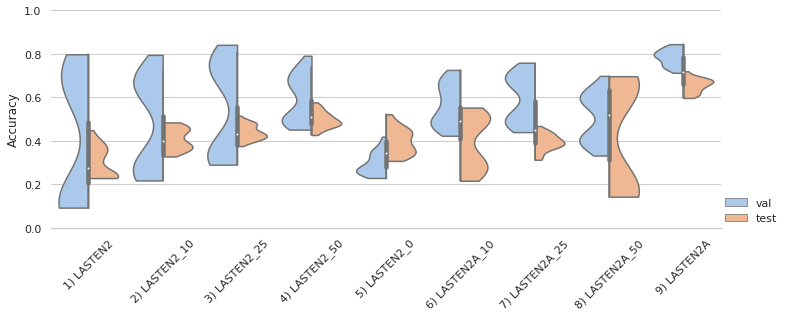

In [7]:
plt.rcParams['figure.figsize'] = 12,4
sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison
ax=sns.violinplot(x="Experiment", y="Accuracy", hue="Set",
               split=True,
               cut=0,
               #palette={"val": "m", "test": "r"},
               whis=[0, 100],
               data=data,
                 scale="width")

ax.set(ylim=(0.0, 1.0))
ax.set_xlabel("")
sns.despine(left=True)
plt.legend(loc=(1.0, 0.0), frameon=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.savefig("violin_nn.svg")

In [7]:
mean_acc_val = []
mean_acc_test = []
indices = ["1) LASTEN2",
           "2) LASTEN2_10",
           "3) LASTEN2_25",
           "4) LASTEN2_50",
           "5) LASTEN2_0",
           "6) LASTEN2A_10",
           "7) LASTEN2A_25",
           "8) LASTEN2A_50",
           "9) LASTEN2A"]
indices_str = x = np.array(indices)

for i in indices:
    print(i)
    mean_acc_val.append(data[data.Experiment==i][data.Set=='val']['Accuracy'].mean())
    mean_acc_test.append(data[data.Experiment==i][data.Set=='test']['Accuracy'].mean())

1) LASTEN2
2) LASTEN2_10
3) LASTEN2_25
4) LASTEN2_50
5) LASTEN2_0
6) LASTEN2A_10
7) LASTEN2A_25
8) LASTEN2A_50
9) LASTEN2A


<ipython-input-7-b37ef5132514>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mean_acc_val.append(data[data.Experiment==i][data.Set=='val']['Accuracy'].mean())
<ipython-input-7-b37ef5132514>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mean_acc_test.append(data[data.Experiment==i][data.Set=='test']['Accuracy'].mean())


In [8]:
def show_values_on_bars(axs, h_v="v", space=-0.4, offset = 0.001):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + offset
                value = round(p.get_height(),2)
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() + offset
                value = round(p.get_width(),4)
                ax.text(_x, _y, value, ha="center")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

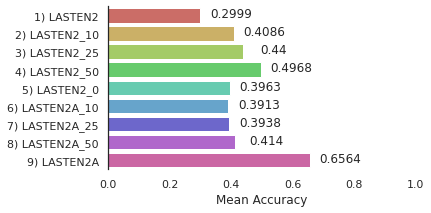

In [11]:
plt.rcParams['figure.figsize'] = 5.5,3
sns.set(style="white")#, context="talk")
ax = sns.barplot(y=indices_str, x=mean_acc_test, order=indices_str, palette="hls")

ax.set_xlabel("Mean Accuracy")
ax.set(xlim=(0.0, 1.0))

show_values_on_bars(ax, h_v="h", space=0.1, offset=-0.3)
sns.despine(bottom=True)

plt.savefig("barblot_nn_test.svg")